# **Applied Data Science**

---

**Homework 1**

**Erfan Karami**

**Date:** Fall 2025

**Tehran Institute for Advanced Studies**

---

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
from arabic_reshaper import reshape
import utils
import re
from scipy import stats
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading dataset

In [2]:
DATA_PATH = "../dataset/Job.csv"

In [3]:
jobs = pd.read_csv(DATA_PATH,low_memory=False)

In [4]:
jobs.head()

,company_size,education,gender,salary,workdays,language,business_trip,industry,bonus,location,ad_name,softwares,military_services,experience,date,min_age,max_age
0,30,['کارشناسی| مالی و حسابداری'],ترجیحاً خانم,NaN,شنبه تا چهارشنبه 8 الی 16,['انگلیسی| متوسط ۵۰٪'],-,نفت، گاز و پتروشیمی,-,تهران، فاطمی,کارشناس حسابداری,"['Microsoft Word| متوسط', 'Microsoft Excel| مت...",NaN,NaN,1402-03-23,23.0,33.0
1,125,NaN,فقط آقا,12 - 10 میلیون تومان,شنبه تا چهارشنبه 8 تا 17:33، پنجشنبه 8:30 تا ...,NaN,-,تولیدی / صنعتی,پاداش -بیمه درمان تکمیلی,رباط کریم,کارگر ساده - آقا,NaN,اتمام خدمت سربازی و یا معافیت از آن الزامی است,NaN,1402-02-26,23.0,45.0
2,5000+,NaN,تفاوتی ندارد,NaN,شنبه تا چهارشنبه 7 الی 16,NaN,-,بانکداری,وام -پاداش -بیمه درمان تکمیلی -تسهیلات تفری...,تهران، آرژانتین,کارشناس موشن گرافیست,"['Adobe Photoshop| پیشرفته', 'Adobe Illustrato...",اتمام خدمت سربازی و یا معافیت از آن الزامی است,NaN,1402-02-11,NaN,35.0
3,30,NaN,تفاوتی ندارد,20 - 15 میلیون تومان,10 تا 20,['انگلیسی| متوسط ۵۰٪'],-,سرمایه گذاری و مالی,پورسانت,تهران، جردن,مدیر اجرایی,"['Microsoft Word| متوسط', 'Microsoft Powerpoin...",NaN,NaN,1402-02-12,25.0,43.0
4,750,NaN,فقط آقا,NaN,شیفت شب ( 3 روز در هفته ),['انگلیسی| متوسط ۵۰٪'],-,سرمایه گذاری و مالی,بیمه درمان تکمیلی -اتاق بازی -ناهار -میان و...,کرج، حیدرآباد,کارشناس مرکز تماس ( شیفت شب) - آقا,NaN,اتمام خدمت سربازی و یا معافیت از آن الزامی است,NaN,1402-04-06,20.0,30.0


# Dataset Overview

In [5]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34101 entries, 0 to 34100
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_size       34101 non-null  object 
 1   education          17660 non-null  object 
 2   gender             33498 non-null  object 
 3   salary             9390 non-null   object 
 4   workdays           33495 non-null  object 
 5   language           14214 non-null  object 
 6   business_trip      33494 non-null  object 
 7   industry           33498 non-null  object 
 8   bonus              33498 non-null  object 
 9   location           33498 non-null  object 
 10  ad_name            33498 non-null  object 
 11  softwares          18641 non-null  object 
 12  military_services  10687 non-null  object 
 13  experience         13 non-null     object 
 14  date               34101 non-null  object 
 15  min_age            20993 non-null  float64
 16  max_age            226


### 1. Dataset Description
This dataset is a comprehensive collection of Persian-language job postings scraped from the **JobVision** website in accordance with their terms of use.  
It contains job opportunities in **Iran during 2022–2023**, representing more than **34,000 job postings** across various industries and roles.

The dataset is particularly valuable for:
- **Natural Language Processing (NLP)** tasks in Persian
- **Employment trend analysis**
- **Labor market research**
- **Machine learning applications** such as job category prediction or skill extraction

---

### 2. Feature Summary

| Column | Description | Non-null Count | Missing Values |
|---------|--------------|----------------|----------------|
| `company_size` | Size of the company | 34,101 | 0 |
| `education` | Required education level | 17,660 | 16,441 |
| `gender` | Preferred gender for applicants | 33,498 | 603 |
| `salary` | Offered or expected salary (string format) | 9,390 | 24,711 |
| `workdays` | Working days per week | 33,495 | 606 |
| `language` | Required languages | 14,214 | 19,887 |
| `business_trip` | Whether the position involves travel | 33,494 | 607 |
| `industry` | The business domain of the employer | 33,498 | 603 |
| `bonus` | Availability of performance-based bonus | 33,498 | 603 |
| `location` | City or region of the job | 33,498 | 603 |
| `ad_name` | The advertisement title of the job posting | 33,498 | 603 |
| `softwares` | Software skills required for the position | 18,641 | 15,460 |
| `military_services` | Military service status requirement (for male applicants) | 10,687 | 23,414 |
| `experience` | Years of required experience | 13 | 34,088 |
| `date` | Date of job posting | 34,101 | 0 |
| `min_age` | Minimum suggested age | 20,993 | 13,108 |
| `max_age` | Maximum suggested age | 22,616 | 11,485 |

---


# Exploratory Data Analysis (EDA) and Visualization Plan

After the initial inspection, it is clear that the dataset contains a considerable number of **missing values** and some **inconsistent or non-standard data types**.  
Before performing any modeling or preprocessing, it is essential to explore each feature carefully to understand its characteristics, identify patterns, and detect possible issues such as:

- Missing or incomplete records  
- Outliers or inconsistent categorical labels  
- Non-numeric representations of numerical data  
- Unbalanced distributions or rare categories  

Since gaining meaningful insights from data almost always requires visual interpretation, the **Exploratory Data Analysis (EDA)** phase will be performed **in combination with data visualization**.  

In the following sections, we will explore the dataset **feature by feature**, using both descriptive statistics and appropriate visualization techniques to derive insights.


### company size

Size of the company

In [6]:
jobs["company_size"].value_counts()

company_size
30         10063
125         8184
350         4563
<10         3962
750         3123
3000        2688
5000+        915
Unknown      603
Name: count, dtype: int64

It's good to convert company size from object to int to have better visualizations and consistant data, to do this we perform following transformation:

* converting <10 to 10
* converting 5000+ to 5000
* converting unknown to NaN

In [7]:
# converting values in company_size to numeric for analysis
jobs.loc[jobs["company_size"] == "<10","company_size"] = 10
jobs.loc[jobs["company_size"] == "5000+","company_size"] = 5000
jobs.loc[jobs["company_size"] == "Unknown","company_size"] = np.nan
jobs["company_size"] = jobs["company_size"].astype(float)

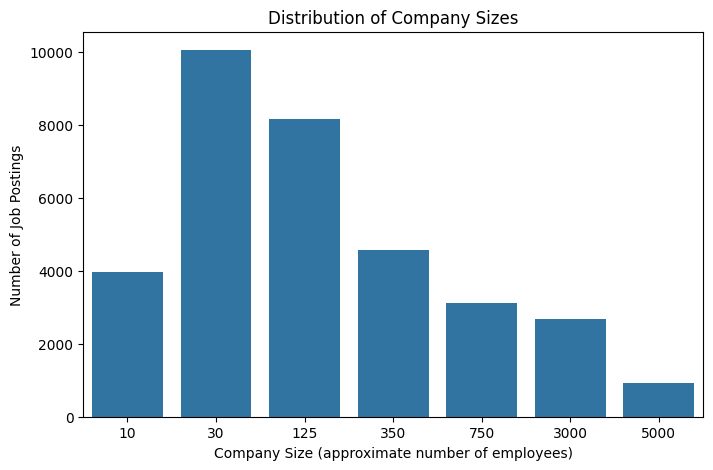

In [8]:
# Sort by company size value for logical ordering
company_size_counts = jobs['company_size'].value_counts().sort_index()

# plot company size distribution
plt.figure(figsize=(8,5))
sns.barplot(x=company_size_counts.index.astype(int), y=company_size_counts.values)
plt.title("Distribution of Company Sizes")
plt.xlabel("Company Size (approximate number of employees)")
plt.ylabel("Number of Job Postings")
plt.show()

So `company size` has right skewed distribution.

### education

Required education level

In [9]:
jobs["education"].value_counts()

education
['کارشناسی| مالی و حسابداری']                                                                                                                                                                                                                                              3230
['کارشناسی| مدیریت / بازرگانی / کسب و کار']                                                                                                                                                                                                                                1611
['کارشناسی| کامپیوتر / فناوری اطلاعات']                                                                                                                                                                                                                                    1415
['کارشناسی| مهندسی صنایع']                                                                                                                                                    

So this columns  includes row data that each one is a list of `degree|majore` items, for having better visualizatoins we keep top 6 frequency of educations in a pi plot.

**also we can have this insight that this column can be seperated to two different columns one for majors and one for degrees we may do this later in feature engineering part.**

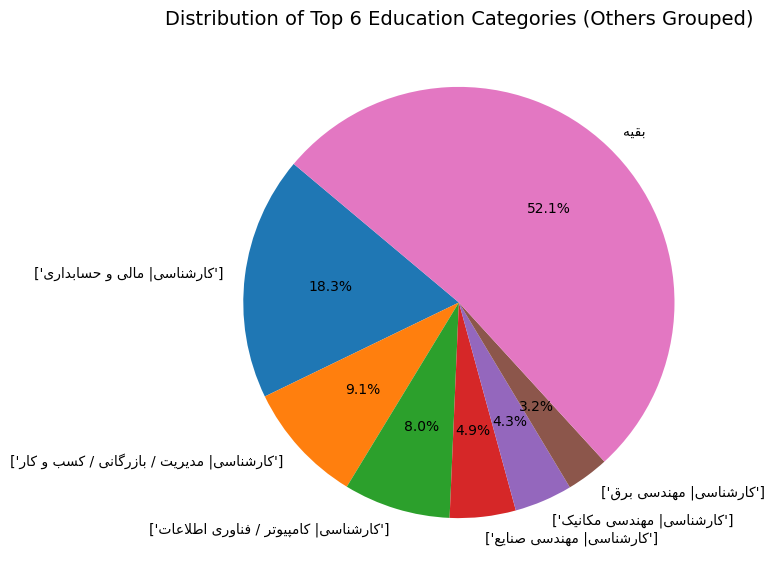

In [10]:
utils.plot_top_k_pie_chrt(
   jobs,
   "education",
   k=6,
   title="Distribution of Top 6 Education Categories (Others Grouped)"
)

So we can see that most of job positions are in category `finance and accounting` and 
in engineering groups for `computer engineering and IT`, specially for bachlor degree!\\
Also we can have a chart just on degree job positions.

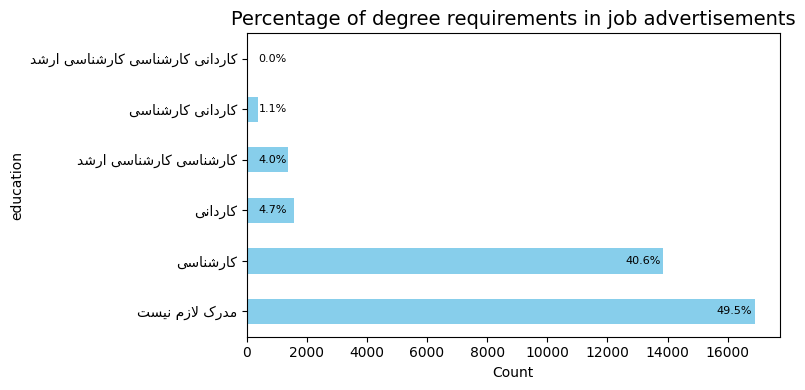

In [11]:
# aggregation and ploting major information
majors_requirements = jobs['education'].apply(lambda x: utils.major_categorizer(x)).value_counts()
persian_labels = [get_display(reshape(label.strip())) for label in majors_requirements.index]

percentages = majors_requirements / majors_requirements.sum() * 100

plt.figure(figsize=(8,4))
ax = majors_requirements.plot.barh(color='skyblue')

ax.set_yticks(range(len(persian_labels)))
ax.set_yticklabels(persian_labels)

for i, (value, pct) in enumerate(zip(majors_requirements, percentages)):
    ax.text(max(400,value - 15 * majors_requirements.max() * 0.005), 
            i, 
            f"{pct:.1f}%", 
            va='center', 
            fontsize=8)

ax.set_xlabel("Count")
ax.set_title("Percentage of degree requirements in job advertisements", fontsize=14)
plt.tight_layout()
plt.show()

Most job positions do not require any degree, while others typically require a **bachelor’s** or **associate** degree.

### gender 
preferred gender for applicant

In [12]:
jobs["gender"].value_counts()

gender
تفاوتی ندارد       17869
فقط آقا             6618
فقط خانم            4572
ترجیحاً خانم        1888
ترجیحاً آقا         1872
Men / Women          623
Only Men              24
Preferred Men         12
Only Women            10
Preferred Women       10
Name: count, dtype: int64

We can see that Options have been saved in different formats so we can convert them to a consistant format.
for example **convert all to Persian**, we will apply this in data cleaning step, but for now we will do it to better visualization and insidghts.

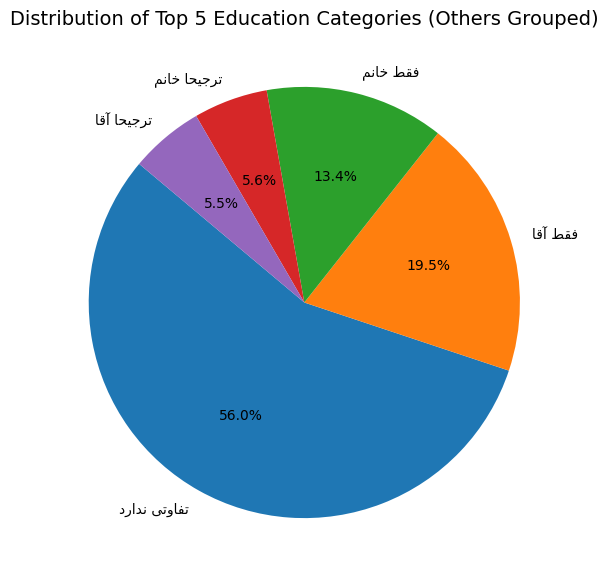

In [13]:
gender_requirement = jobs['gender'].apply(lambda x : utils.gender_cleaner(x))

utils.plot_top_k_pie_chrt(
   gender_requirement,
   "gender",
   k=5,
   title="Distribution of Top 5 Education Categories (Others Grouped)",
   contain_rest=False
)

### salary
Offered or expected salary for job position

In [14]:
for i in jobs["salary"].unique():
   print(i)

nan
12 - 10 میلیون تومان
20 - 15 میلیون تومان
35 - 25 ميليون تومان
10 - 8 میلیون تومان
15 - 12 میلیون تومان
45 - 35 ميليون تومان
8 - 6 میلیون تومان
4 - 3 میلیون تومان
25 - 20 میلیون تومان
8 - 10 Million Tomans
Above 60 Million Tomans
60 میلیون تومان به بالا
5 - 4 میلیون تومان
15 - 20 Million Tomans
5 - 6 Million Tomans
60 - 45 میلیون تومان
35 - 45 Million Tomans
20 - 25 Million Tomans
25 - 35 Million Tomans
10 - 12 Million Tomans
6 - 5 میلیون تومان
12 - 15 Million Tomans
45 - 60 Million Tomans
6 - 8 Million Tomans


For having better visualization and understanding data we seperate min value and max value of sallary then visualize them

In [15]:
min_salary_range = jobs["salary"].apply(lambda x: utils.salary_cleaner(x, return_min=True))
max_salary_range = jobs["salary"].apply(lambda x: utils.salary_cleaner(x, return_min=False))

In following we have box plot of average salary

In [16]:
avg_salary = (min_salary_range + max_salary_range) / 2
avg_salary.unique()

array([ nan, 11. , 17.5, 30. ,  9. , 13.5, 40. ,  7. ,  3.5, 22.5, 60. ,
        4.5,  5.5, 52.5])

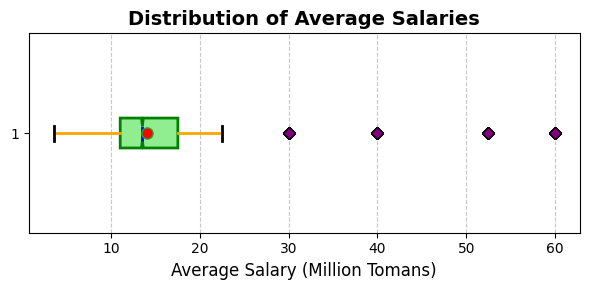

In [17]:
# Compute average salary
avg_salary = (min_salary_range + max_salary_range) / 2

plt.figure(figsize=(6, 3)) 

# Custom boxplot
box = plt.boxplot(avg_salary.dropna(),
                  vert=False,       
                  patch_artist=True, 
                  notch=True,        
                  showmeans=True,    
                  meanprops=dict(marker='o', markerfacecolor='red', markersize=8),
                  medianprops=dict(color='blue', linewidth=2),
                  boxprops=dict(facecolor='lightgreen', color='green', linewidth=2),
                  whiskerprops=dict(color='orange', linewidth=2),
                  capprops=dict(color='black', linewidth=2),
                  flierprops=dict(marker='D', markerfacecolor='purple', markersize=6, alpha=0.6)
                 )

plt.xlabel("Average Salary (Million Tomans)", fontsize=12)
plt.title("Distribution of Average Salaries", fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

SO in time of collecting data average salaries of ads have been about 5 to 25 milion tomans. And salaries with 30 or above was outliers!
in following we will see plot for min salary value and max salary value seperated.

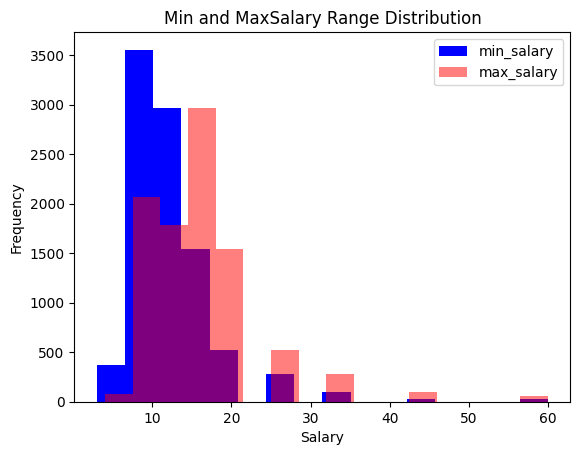

In [18]:
plt.hist(min_salary_range.dropna(), bins=16,color='blue')
plt.hist(max_salary_range.dropna(), bins=16,color='red',alpha=0.5)
plt.legend(['min_salary', 'max_salary'])
plt.title('Min and MaxSalary Range Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

We can see that distribution of both has long tail in right. and this is completelly reasonable, in job market almost all jobs has normal distributions except some specific and important jobs that are more specialized and have an high amount of salary. In part of `data cleaning` we will seperate Min and Max values, and also add Averages salary in `feature engineering` part later.

### workday
Working day per week

In [19]:
jobs['workdays'].to_csv('workdays.csv',index=False)

In [20]:
jobs['workdays'].value_counts()

workdays
شنبه تا چهارشنبه                                 1051
شنبه تا پنجشنبه                                   807
شنبه تا پنج شنبه                                  674
شنبه تا چهارشنبه 11 تا 18                         509
شنبه تا چهارشنبه 8 الی 17                         466
                                                 ... 
شنبه تا چهار شنبه 9-16 و پنجشنبه تا 14              1
شنبه تا چهارشنبه 08:00 لغایت 17:18                  1
شنبه تا چهارشنبه 10 الی 18  پنج شنبه ها تا 13       1
یا دورکاری یا نیمه حضوری                            1
شنبه تا چهارشنبه ساعت 8 صبح الی 17:15               1
Name: count, Length: 11983, dtype: int64

**This column is very important but not consistant and not clean** and human reasdable in place of machine readable data. for cleaning this column I will use an LLM (GPT 5.1) to parse data in four different columns:

- workdays in week
- work hour times of work in week
- is work remote?
- is work flexible?


In following we have the result.


In [21]:
workdays = pd.read_csv('./workdays_parsed.csv',index_col=False)
workdays

,workdays,days_per_week,hours_per_week,is_remote,is_flexible
0,شنبه تا چهارشنبه 8 الی 16,5.0,48.0,0,0
1,شنبه تا چهارشنبه 8 تا 17:33، پنجشنبه 8:30 تا ...,6.0,65.3,0,0
2,شنبه تا چهارشنبه 7 الی 16,5.0,54.0,0,0
3,10 تا 20,NaN,NaN,0,0
4,شیفت شب ( 3 روز در هفته ),NaN,NaN,0,0
...,...,...,...,...,...
34096,شنبه تا چهارشنبه 7:30 الی 16 و پنجشنبه ها یک د...,5.0,51.0,0,0
34097,همه روزه 7:30 الی 16:00 - پنج شنبه ها یک هفته ...,NaN,NaN,0,0
34098,شنبه تا چهارشنبه 8:00 الی 17:00,5.0,54.0,0,0
34099,17-Sep,NaN,NaN,0,0


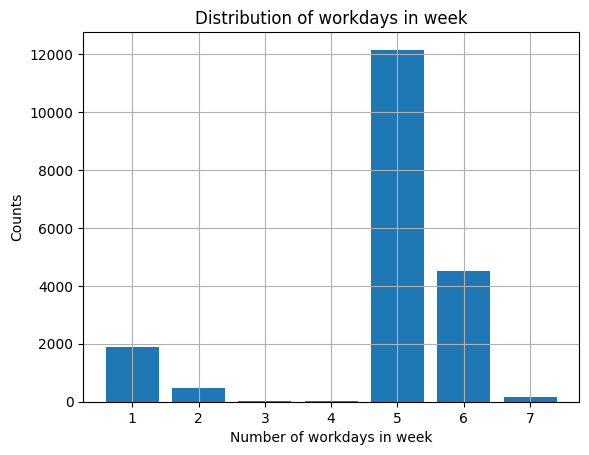

In [22]:
temp = workdays['days_per_week'].value_counts()

plt.bar(temp.index,temp.values)
plt.xlabel('Number of workdays in week')
plt.ylabel('Counts')
plt.grid(True)
plt.title("Distribution of workdays in week")
plt.show()


Workdays < 3 is strange so it's better to check it first

In [23]:
refined_days_per_week = workdays[workdays['days_per_week'] <=2 ]['workdays'].apply(lambda x : utils.days_per_week_refinement(x))
workdays.iloc[refined_days_per_week[refined_days_per_week <= 2 ].index]

,workdays,days_per_week,hours_per_week,is_remote,is_flexible
166,شنبه ساعت 8:30 الی 14:30,1.0,6.0,0,0
180,08:30 الی 17:30 پنج شنبه ها الی 13:30,1.0,9.0,0,0
363,شنبه تا چهارشنبه 8-17 پنج شنبه 8 الی 12,1.0,4.0,0,0
530,ساعت کاری :8:15 الی 17:15 پنج شنبه ها تعطیل می...,1.0,9.0,0,0
639,شنبه تا پنچ شنبه 9 تا 18,1.0,9.0,0,0
...,...,...,...,...,...
33520,از شنبه تا 4 شنبه 9:30 الی 18_ 5 شنبه 9:30 ال...,2.0,17.0,0,0
33573,شنبه تا پنچ شنبه 7 الی 15 - شیفت چرخشی,1.0,8.0,0,0
33761,شنبه تا چهارشنه ساعت 8:30 الی 17، پنجشنبه 8:30...,2.0,17.5,0,0
33844,شنبه تا چهارشبه 8:00 الی 16:30 - پنجشنبه 8:00 ...,2.0,16.5,0,0


Now it seems a lot's of wrongs has been corrected, so good!

In [24]:
workdays.loc[workdays['days_per_week']<=2 ,"hours_per_week"] =  workdays[workdays['days_per_week']<=2]["hours_per_week"] * refined_days_per_week
workdays.loc[workdays['days_per_week']<= 2,"days_per_week"] =  refined_days_per_week

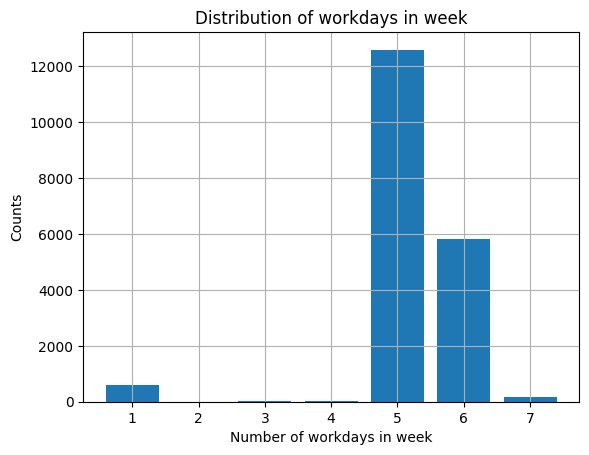

In [25]:
temp = workdays['days_per_week'].value_counts()

plt.bar(temp.index,temp.values)
plt.xlabel('Number of workdays in week')
plt.ylabel('Counts')
plt.grid(True)
plt.title("Distribution of workdays in week")
plt.show()

Now it seems better and more resonable.

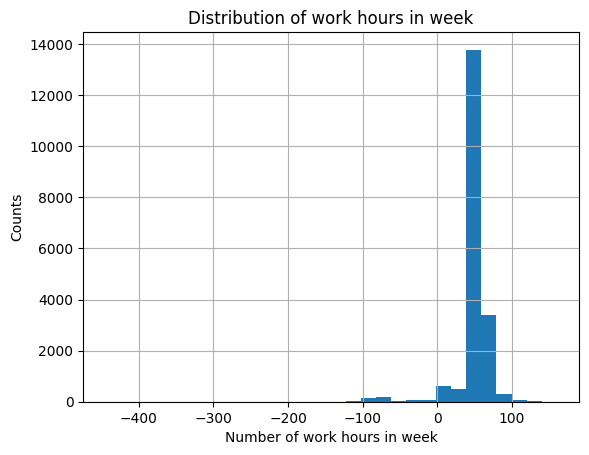

In [26]:
workdays['hours_per_week'].hist(bins=30)
plt.xlabel('Number of work hours in week')
plt.ylabel('Counts')
plt.grid(True)
plt.title("Distribution of work hours in week")
plt.show()

We can see that we have negative work hours symmetric to positive values, so we regard absoloute value of work hours. and plot it again

In [27]:
workdays['hours_per_week'] = workdays['hours_per_week'].abs()
workdays[workdays['hours_per_week'] > 120] = 120 # havign more that 120 hours in week is not reasonable

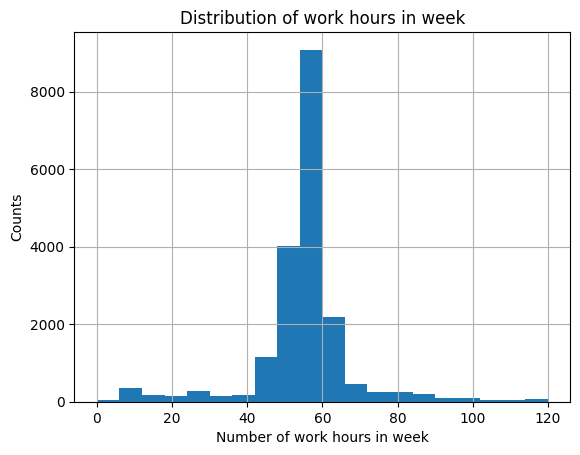

In [28]:
workdays['hours_per_week'].hist(bins=20)
plt.xlabel('Number of work hours in week')
plt.ylabel('Counts')
plt.grid(True)
plt.title("Distribution of work hours in week")
plt.show()

We can see that ***work hours in week*** almost distributed as normal.

You can see that method have pros and cons:

- Extracted data for most rows are accurate
- For some values estimates are not accurate at all for example for row 34100:`شنبه تا چهار شنبه 08:00 الی 17:30` extracted `days_per_week` is 1 but true value is 5.

Now after refinement to having a good understanding how much our way is good, we use following method:
for simplicity we assume that LLM is an extracting machine that for random variable $X$ in text outputs following value: 

$$
\hat{X} = X + \delta
$$

where delta has $N(\mu,\sigma)$ distribution and it's error term. for having a good extimation for amount of error, we use a subset with size for example about $n=40$ rows and estimate $\hat{\mu} = \frac{\Sigma_i \delta_i}{n}$ by calculating exact values of $X$ and calculating difference of $\delta_i = X_i - \hat{X}_i$.

finally we will have an unbiased estimate of how much our cleaning method is good.

In [29]:
sample_days = (
    workdays[workdays["days_per_week"].notna()]
    .sample(n=40, random_state=42)
)


# ----- Sample from hours_per_week (non-NaN only) -----
sample_hours = (
    workdays[workdays["hours_per_week"].notna()]
    .sample(n=40, random_state=42)
)


In [30]:
sample_days

,workdays,days_per_week,hours_per_week,is_remote,is_flexible
22381,شنبه الی چهارشنبه 08:30 الی 17:00 و پنجشنبه ه...,6.0,59.0,0,0
30686,از شنبه تا چهارشنبه از ساعت 8 تا 17 - پنجشنبه ...,5.0,54.0,0,0
33308,شنبه تا چهارشنبه 8 تا 17,5.0,54.0,0,0
22654,شنبه الی چهارشنبه 9 الی 18- پنجشنبه 9 الی 13,6.0,62.0,0,0
22393,شنبه تا چهارشنبه8 الی 17 و پنجشنبه ها یک هفته ...,5.0,54.0,0,0
21017,شنبه تا چهارشنبه از ساعت 8 الی 17:20,5.0,56.0,0,0
5196,شنبه تا پنج شنبه 8 تا 16,6.0,48.0,0,0
14473,شنبه تا چهارشنبه از ساعت 07:00 الی 16:00,5.0,54.0,0,0
25490,شنبه تا چهارشنبه 8 الی 17,5.0,54.0,0,0
26150,08:00 الی 17:00شنبه تا چهارشنبه,5.0,54.0,0,0


Now we store residuals for `days_per_week` and use T_test for following hypotesis test:

$$
H_0: \text{mean residual } \mu = 0
$$
$$
H₁: \text{mean residual } \mu \neq 0
$$

In [31]:
residuals = [
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
]

delta = sum(residuals)/ len(residuals)
print(f"estimation of delta : {round(delta,2)}")

# Perform one-sample t-test against mean = 0
t_stat, p_value = stats.ttest_1samp(residuals, popmean=0)

print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0: mean residual is significantly different from 0")
else:
    print("Fail to reject H0: mean residual is NOT significantly different from 0")

estimation of delta : 0.17
t-statistic: 2.0123585110162416
p-value: 0.050949433279106886
Fail to reject H0: mean residual is NOT significantly different from 0


Good news! this shows our cleaning method is **unbiased** in extracting `workdays` data, know it's time to check for `work hours in a week` with just first 23 of 40

In [32]:
residuals = [
12.5,9,9,13,5,9.5,0,9,9,10,10,16,8,9,35.5,9,12.5,9,0,11,5.5,0,3,10,
]

delta = sum(residuals)/ len(residuals)
print(f"estimation of delta : {round(delta,2)}")

# Perform one-sample t-test against mean = 0
t_stat, p_value = stats.ttest_1samp(residuals, popmean=0)

print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0: mean residual is significantly different from 0")
else:
    print("Fail to reject H0: mean residual is NOT significantly different from 0")

estimation of delta : 9.35
t-statistic: 6.613677091386124
p-value: 9.522537436669563e-07
Reject H0: mean residual is significantly different from 0


So our method for estimation of `work hours in a week` is biased and it's not completely good, but we ceep it as it's an important feature

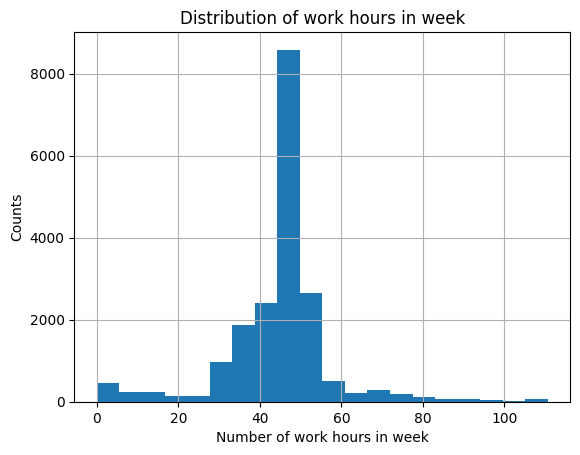

In [33]:
workdays['hours_per_week'] = (workdays['hours_per_week'] - delta).clip(0)

workdays['hours_per_week'].hist(bins=20)
plt.xlabel('Number of work hours in week')
plt.ylabel('Counts')
plt.grid(True)
plt.title("Distribution of work hours in week")
plt.show()

Now our estimation is unbiased on average! Now lets have a pie chart that describes `flexibility of work time` and `remote work` 

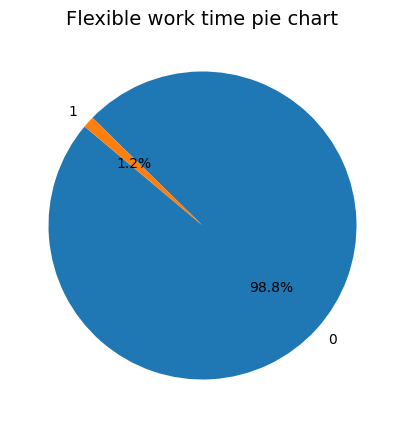

In [34]:

flexible_worktime = workdays[workdays['is_remote'] !=120]['is_flexible']

utils.plot_top_k_pie_chrt(
   flexible_worktime,
   "worktime",
   k=2,
   title="Flexible work time pie chart",
   contain_rest=False,
   persian=False,
   figsize=(5,5)
)

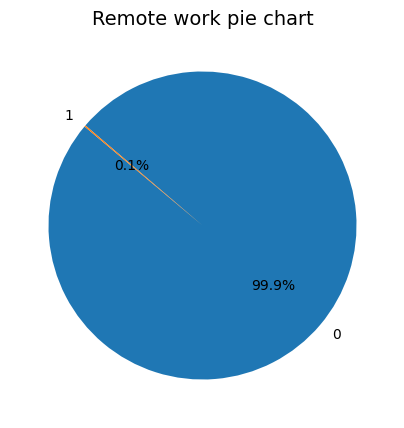

In [35]:

remote_work = workdays[workdays['is_remote'] !=120]['is_remote']


utils.plot_top_k_pie_chrt(
   remote_work,
   "worktime",
   k=2,
   title="Remote work pie chart",
   contain_rest=False,
   persian=False,
   figsize=(5,5)
)

So the result of our process shows following facts: 

- Most of works requiers 5 or 6 days of work in a week
- Distribution of work hours in a week has normal distribution with $\mu \approx 45$ hours
- Only 1% of jobs has flexible work time
- Just 0.1% of works provide remote work time

so we might `is_flexible` and `is_remote` later if we see they are not very important.


### language

Language required for job position.

In [36]:
jobs['language'].value_counts()

language
['انگلیسی| متوسط ۵۰٪']                                                7168
['انگلیسی| بالاتر از متوسط ۷۰٪']                                      2767
['انگلیسی| پایین تر از متوسط ۳۰٪']                                    1941
['انگلیسی| مقدماتی ۱۰٪']                                               744
['انگلیسی| پیشرفته ۹۰٪']                                               712
                                                                      ... 
['انگلیسی| بالاتر از متوسط ۷۰٪', 'چینی| پایین تر از متوسط ۳۰٪']          1
['انگلیسی| بالاتر از متوسط ۷۰٪', 'عربی| در حد زبان مادری ۱۰۰٪']          1
['انگلیسی| بالاتر از متوسط ۷۰٪', 'چینی| متوسط ۵۰٪']                      1
['عربی| بالاتر از متوسط ۷۰٪', 'انگلیسی| متوسط ۵۰٪']                      1
['English| Upper Intermediate 70%', 'Turkish| Intermediate - 50%']       1
Name: count, Length: 129, dtype: int64

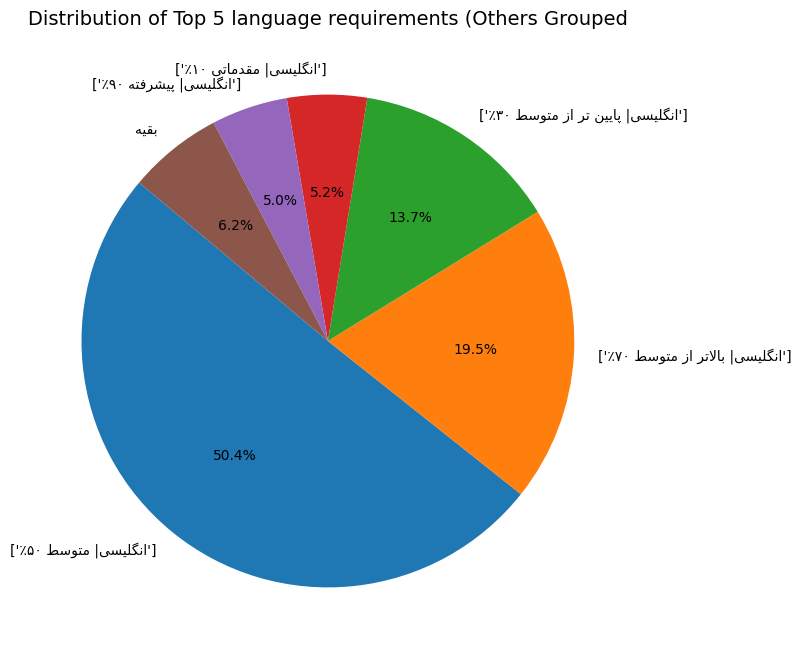

In [37]:
utils.plot_top_k_pie_chrt(
   jobs,
   "language",
   k=5,
   title="Distribution of Top 5 language requirements (Others Grouped",
   contain_rest=True,
   persian=True,
   figsize=(8,8)
)

We have following observations:

- more than 95% of jobs that require foreign language skill, require English
- just about 25 % of jobs require high level language skill

now we can clean this column in following manner:

For each language that has been required in some job ads we define an column then for every data row we can extract level required in a number $X \in [0,100]$ if a column not requires a language skill it's value will be zero and for nan rows all columns will be 0.

In [38]:
extracted_language_df = utils.clean_language_column(jobs,"language")
extracted_language_df

,language_parsed,lang_Arabic,lang_Armenian,lang_Chinese,lang_Dutch,lang_English,lang_French,lang_German,lang_Hindi,lang_Italian,lang_Japanese,lang_Korean,lang_Kurdish,lang_Persian,lang_Russian,lang_Spanish,lang_Turkish
0,[انگلیسی| متوسط ۵۰٪],0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0
1,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,[انگلیسی| متوسط ۵۰٪],0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0
4,[انگلیسی| متوسط ۵۰٪],0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34096,[انگلیسی| متوسط ۵۰٪],0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0
34097,[انگلیسی| متوسط ۵۰٪],0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0
34098,[انگلیسی| مقدماتی ۱۰٪],0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0
34099,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
(extracted_language_df.iloc[:,1:] > 0).sum()

lang_Arabic         83
lang_Armenian        2
lang_Chinese        13
lang_Dutch           1
lang_English     13993
lang_French         30
lang_German         38
lang_Hindi           1
lang_Italian         2
lang_Japanese        2
lang_Korean         17
lang_Kurdish         5
lang_Persian         7
lang_Russian        46
lang_Spanish        18
lang_Turkish        93
dtype: int64

We can see that almost all information is about English language and this is reasonable because English is the most common language in world, so maybe it be better to just have tow column:
- one for english language requirement
- one for aggregation of other languages (average skill required)

In [40]:
other_langs = extracted_language_df.columns.drop(["lang_English","language_parsed"])
lang_counts = extracted_language_df["language_parsed"].apply(lambda x: len(x))
other_langs_sum = extracted_language_df[other_langs].sum(axis=1)
extracted_language_df["other_langs"] = round(other_langs_sum / lang_counts.replace(0, 1),0)
extracted_language_df.drop(columns=other_langs,inplace=True)
extracted_language_df.drop(columns=['language_parsed'],inplace=True)
extracted_language_df

,lang_English,other_langs
0,50,0.0
1,0,0.0
2,0,0.0
3,50,0.0
4,50,0.0
...,...,...
34096,50,0.0
34097,50,0.0
34098,10,0.0
34099,0,0.0


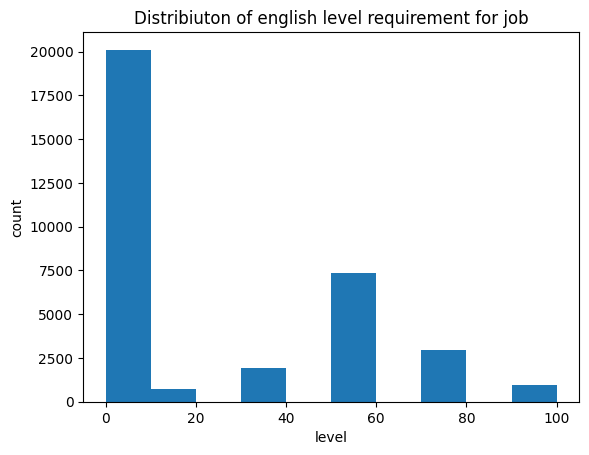

In [41]:
extracted_language_df['lang_English'].plot.hist(bins=10)

plt.xlabel("level")
plt.ylabel("count")
plt.title("Distribiuton of english level requirement for job")
plt.show()

We can see that for `English` language more than 50% of jobs don't require this skill but others have a normal like distributed english level.

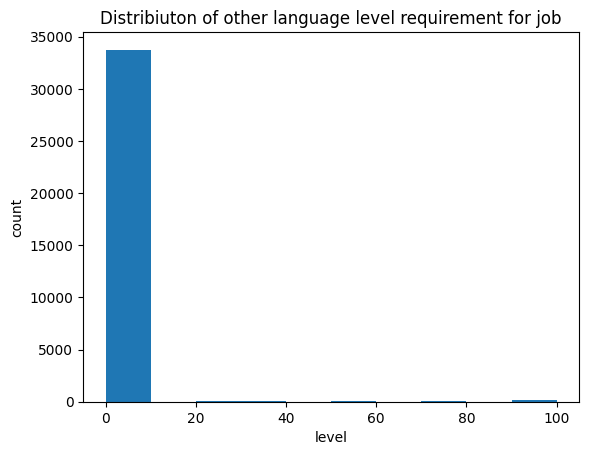

In [42]:
extracted_language_df['other_langs'].plot.hist(bins=10)

plt.xlabel("level")
plt.ylabel("count")
plt.title("Distribiuton of other language level requirement for job")
plt.show()

For other languages this distribution is very imbalanced and jobs with requirement of other languages are very rare and it's completely aligned with our expectaitions and preditctions.


### business_trip
Wheter the position involves travel

In [43]:
jobs['business_trip'].unique()

array(['-', '3 روزدر ماه', '0', 'در صورت لزوم', '2 روز در هفته', 'دارد',
       '2 تا سه روز در هفته', 'ندارد', '3 روز در هفته', 'صفر', nan,
       '30 روز در سال', 'به طور متوسط 4 روز در ماه', 'در صورت نیاز',
       'کمتر از یک هفته در ماه بستگی به شرایط کار دارد.',
       'در صورت نیاز اعزام به کارخانه ایوانکی',
       'با امکان دورکاری و فعالیت پاره وقت', '1', 'مراجعه حضوری به مراکز',
       '12', '2روز در هفته', '6روز', '3 روز در ماه',
       'بسته به نوع پروژه متغیر است', 'این شغل سفر کاری دارد',
       '5 الی 7 روز در ماه', 'بر حسب نیاز شغل', 'به ندرت بنا بر ضرورت',
       'بر حسب نیاز', 'به فراخور کاری و صلاحدید مدیر مربوطه',
       'بنا به ضرورت', '7 روز در ماه', 'برحسب نیاز', '1روز در هفته',
       '3 هفته در ماه', '_', 'یک بار در ماه یا کمتر', '2 روز در ماه',
       'محدود', 'حسب ضرورت 5 روز در ماه', 'متغیر', 'یکبار در ماه',
       'چند روز در ماه', 'سفر به ارمنستان', '3 تا 4 روز در هفته',
       'بنا بر نیاز شرکت ماموریت داریم', 'توافقی', '10-19', 'داخل استانی',
       'بسته

We can see that this column maybe importnat in context of some questions but it's not clean so we clean it

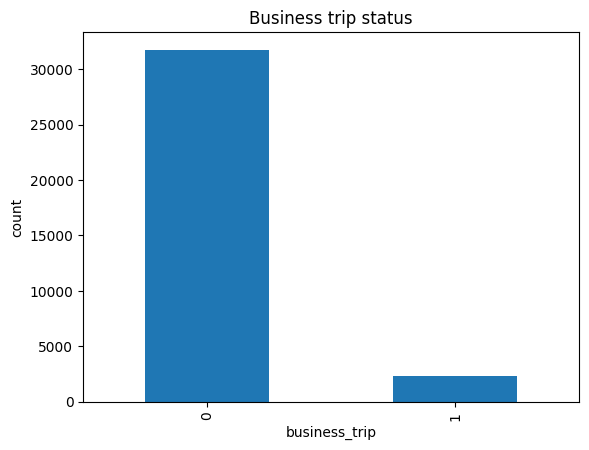

In [44]:
temp = jobs["business_trip"].apply(lambda x: utils.business_trip_filter(x))
temp = temp.value_counts()

temp.plot.bar()
plt.title("Business trip status")
plt.ylabel("count")
plt.show()

### industry
The business domain of the employer

In [45]:
jobs['industry'].unique()

array(['نفت، گاز و پتروشیمی', 'تولیدی / صنعتی', 'بانکداری',
       'سرمایه گذاری و مالی', 'خدمات مهندسی و تخصصی',
       'فناوری اطلاعات / نرم افزار و سخت افزار', 'آموزش / پژوهش',
       'خرده فروشی / مراکز خرید و فروشگاهها', 'کالاهای مصرفی و تند گردش',
       'اینترنت / تجارت الکترونیک / خدمات آنلاین',
       'کترینگ / رستوران / واحدهای غذایی', 'خدمات درمانی و سلامتی',
       'بازاریابی و تبلیغات', 'حمل و نقل / ترابری',
       'طراحی / گرافیک / هنر', 'مد و کالاهای لوکس',
       'خودرو و صنایع وابسته', 'بیمه', 'رسانه / چاپ و نشر',
       'ساخت / مصالح و تجهیزات ساختمانی',
       'کالاهای الکتریکی و لوازم خانگی', 'تجهیزات پزشکی',
       'تجارت / بازرگانی', 'حسابرسی', 'خدمات سازمانی / مشاوره مدیریت',
       'دارو', 'تکنولوژی و نوآوری / سرمایه گذاری خطرپذیر / شتاب دهنده',
       'IT / Software / Hardware', 'شرکت های خدماتی / پیمانکاران',
       'خدمات برگزاری همایش، مجالس، سمینار و نمایشگاه',
       'گردشگری / هتلداری', 'Transportation / Logistics', 'معماری',
       'تلکام', nan, 'ورزشی /

We can see each row has a combined of some industries we must ectract them first to have a better understanding

In [46]:
temp = utils.generate_one_hot_industry(jobs)

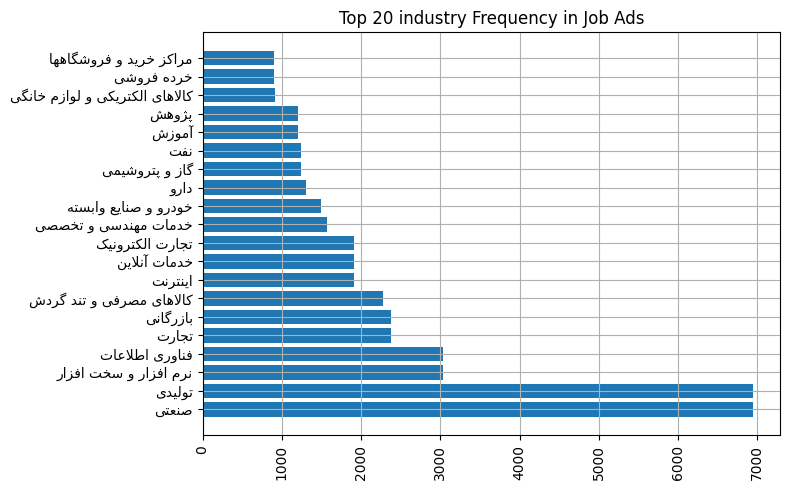

In [47]:
top_n = 20
industry_counts = temp.filter(like="ind_").sum().sort_values(ascending=False).head(top_n)


plt.figure(figsize=(8,5))
plt.barh([get_display(reshape(item[4:])) for item in industry_counts.index], industry_counts.values)
plt.xticks(rotation=90)
plt.title("Top 20 industry Frequency in Job Ads")
plt.tight_layout()
plt.grid(True)
plt.show()

We can see that top industry frequencies in ads are as follows:

- صنعتی: about 7000 ads
- تولیدی: about 7000 ads
- نرم افزار و سخت افزار: about 3000 ads

and etc.

### bonus
Availability of performance-based bonus

In [48]:
jobs['bonus'].value_counts()[:10]

bonus
-                                                             9715
بیمه درمان تکمیلی                                             1023
پورسانت                                                       1013
پاداش                                                          885
پاداش  -پورسانت                                                774
وام  -پاداش  -بیمه درمان تکمیلی  -بسته ها و هدایای مناسبتی     440
بیمه درمان تکمیلی  -بسته ها و هدایای مناسبتی                   358
وام  -بیمه درمان تکمیلی  -بسته ها و هدایای مناسبتی             306
وام  -پاداش  -بیمه درمان تکمیلی                                270
پاداش  -بیمه درمان تکمیلی  -بسته ها و هدایای مناسبتی           269
Name: count, dtype: int64

In [49]:
extracted_bonus = utils.generate_one_hot_bonus(jobs,'bonus')

In [50]:
extracted_bonus.drop(columns=["bonus_list"],inplace=True)

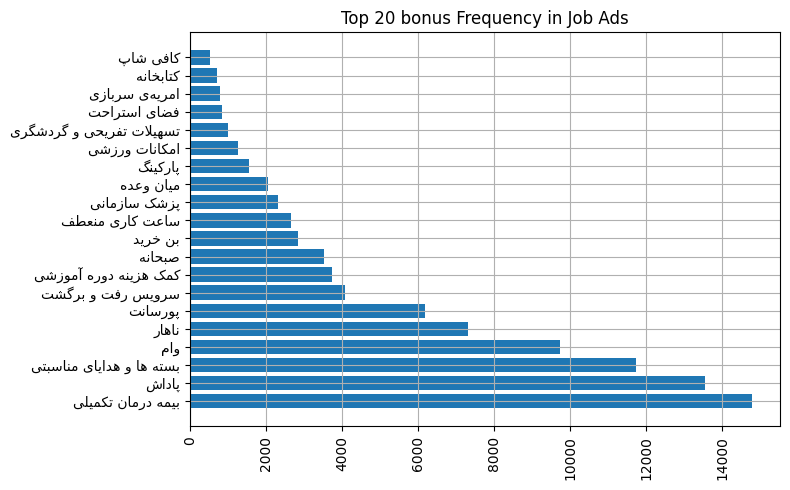

In [51]:
top_n = 20
extracted_bonus_counts = extracted_bonus.filter(like="bonus_").sum().sort_values(ascending=False).head(top_n)


plt.figure(figsize=(8,5))
plt.barh([get_display(reshape(item[6:])) for item in extracted_bonus_counts.index], extracted_bonus_counts.values)
plt.xticks(rotation=90)
plt.title("Top 20 bonus Frequency in Job Ads")
plt.tight_layout()
plt.grid(True)
plt.show()

### location
City or region of the job

In [52]:
print(jobs["location"].value_counts().index)

Index(['تهران، جردن', 'تهران، ونک', 'تهران، آرژانتین', 'تهران، سعادت آباد',
       'تهران، میرداماد', 'تهران، عباس آباد (بهشتی)', 'اصفهان',
       'تهران، جاده مخصوص', 'تهران، مطهری', 'تهران، سهروردی',
       ...
       'بوئین زهراامکان دورکاریامکان جذب کارآموز', 'زاینده رود',
       'کرج، حصارکامکان دورکاریامکان استخدام معلولین', 'تهران، سعد آباد',
       'تهران، بازارامکان دورکاریامکان استخدام معلولین',
       'تهران، شهرک صنعتی شمس آبادامکان استخدام معلولین',
       'امیرکلاامکان دورکاریامکان جذب کارآموزامکان استخدام معلولین',
       'تهران، اوینامکان دورکاریامکان جذب کارآموز',
       'مهرامکان دورکاریامکان استخدام معلولین',
       'تهران، یافت آبادامکان جذب کارآموز'],
      dtype='object', name='location', length=2961)


We can extract name of city form this column

In [53]:
def city_extractor_from_location(text):
   if text is np.nan:
      return text
   
   text_splited = text.split('،')
   return text_splited[0]

In [54]:
city_extracted = jobs['location'].apply(city_extractor_from_location)

Now for all cities with smaller that 500 sample we replace them with `دیگر شهر ها‍‍‍`

In [55]:
other_cities = city_extracted.value_counts() < 500

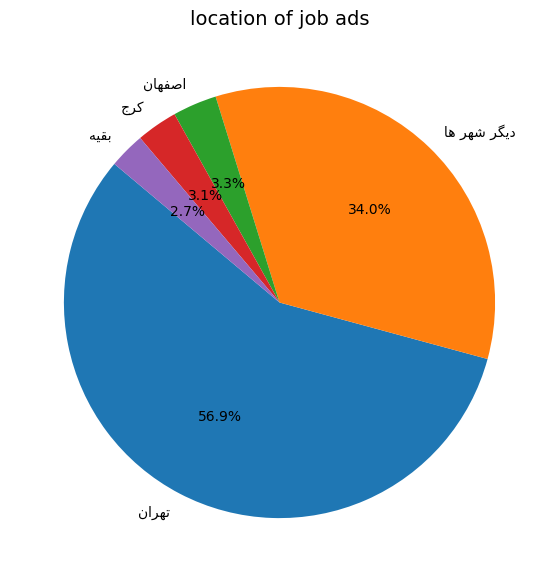

In [56]:
temp = city_extracted.apply(lambda x : 'دیگر شهر ها‍‍' if (x is np.nan or other_cities[x]) else x)

utils.plot_top_k_pie_chrt(
   temp,
   "temp",
   k=4,
   title="location of job ads",
   contain_rest=True,
   persian=True,
   figsize=(7,7)
)

### ad_name
The advertisement title of the job posting

In [57]:
jobs['ad_name']

0                          کارشناس حسابداری
1                          کارگر ساده - آقا
2                      کارشناس موشن گرافیست
3                               مدیر اجرایی
4        کارشناس مرکز تماس ( شیفت شب) - آقا
                        ...                
34096         مسئول فنی (معاونت غذا و دارو)
34097        تکنسین نگهداری و تعمیرات - آقا
34098                 کارشناس حسابداری فروش
34099                   کارمند اداری - خانم
34100                         اپراتور تولید
Name: ad_name, Length: 34101, dtype: object

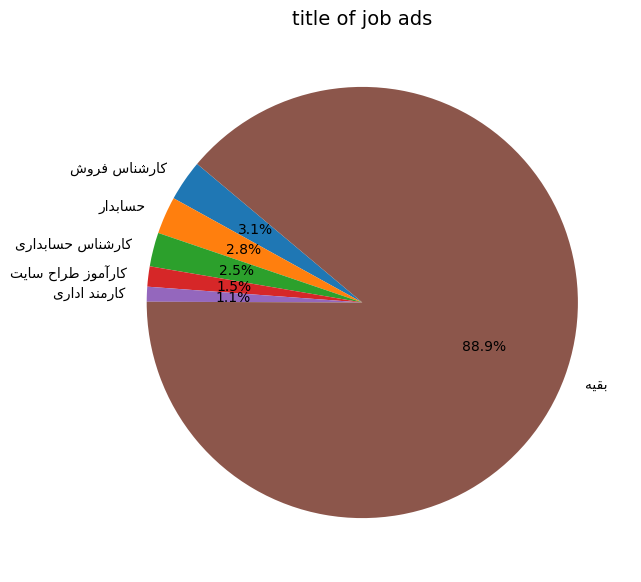

In [58]:
extracted_titles = jobs['ad_name'].apply(lambda x: x.split('-')[0].strip() if x is not np.nan else x)


utils.plot_top_k_pie_chrt(
   extracted_titles,
   "ad_name",
   k=5,
   title="title of job ads",
   contain_rest=True,
   persian=True,
   figsize=(7,7)
)

### software
Software skills required for the position

In [59]:
jobs['softwares'].apply(lambda x: x if x is np.nan else ast.literal_eval(x))[2081][0].split('|')[0]

'سپیدار'

In [60]:
softwares_extracted = utils.clean_software_column(jobs,'softwares')

d:\Khatam\5\ADS\Assignments\1\utils.py:442: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[f"software_{software}"] = 0
d:\Khatam\5\ADS\Assignments\1\utils.py:442: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[f"software_{software}"] = 0
d:\Khatam\5\ADS\Assignments\1\utils.py:442: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In this cleaning levels has following meanings:

- 0: not required
- 1: basic
- 2: intermediate
- 3: advanced

In [ ]:
softwares_extracted

,softwares_parsed,software_.Net Core / .Net,software_3D Studio Max,software_A+,software_AAA (Advanced Aircraft Analysis),software_ACD See,software_ADS (Advanced Design Systems),software_ARC View,software_ARCGIS,software_ASP.Net,...,software_شماران سیستم,software_فن‌آوران (صدور بیمه‌نامه),software_قیاس,software_میزان,software_هلو,software_همکاران سیستم,software_ورا نگر,software_ویژن,software_پیام گستر,software_پیوست
0,"[Microsoft Word| متوسط, Microsoft Excel| متوسط...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,[],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[Adobe Photoshop| پیشرفته, Adobe Illustrator| ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Microsoft Word| متوسط, Microsoft Powerpoint| ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34096,[],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34097,[],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34098,"[Microsoft Word| متوسط, Microsoft Powerpoint| ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34099,"[Microsoft Excel| متوسط, Microsoft Word| متوسط]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


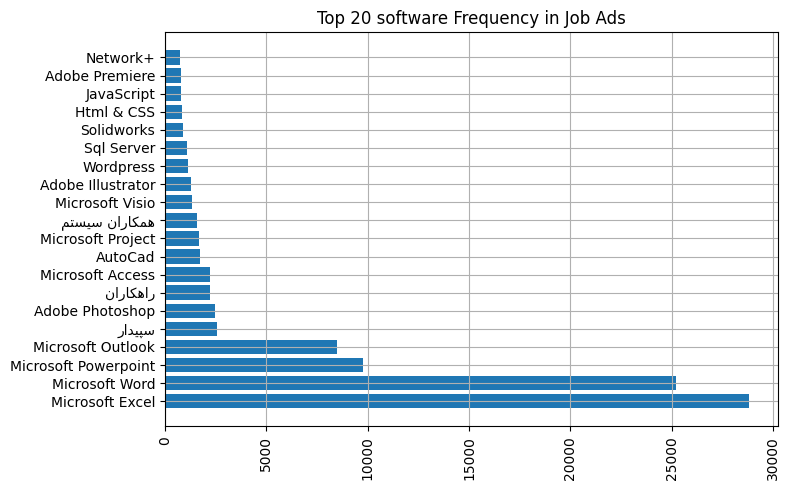

In [ ]:
top_n = 20
extracted_bonus_counts = softwares_extracted.filter(like="software_").sum().sort_values(ascending=False).head(top_n)


plt.figure(figsize=(8,5))
plt.barh([get_display(reshape(item[9:])) for item in extracted_bonus_counts.index], extracted_bonus_counts.values)
plt.xticks(rotation=90)
plt.title("Top 20 software Frequency in Job Ads")
plt.tight_layout()
plt.grid(True)
plt.show()

We can see that microsft softwares are among most required softwares in job ads! and this can be resonable with lookinga at most frequent job titles that are `accounting` positions.

### military_service

Military service status requirement (for male applications)

In [ ]:
military_service_status = jobs['military_services'].apply(utils.military_service_cleaner)

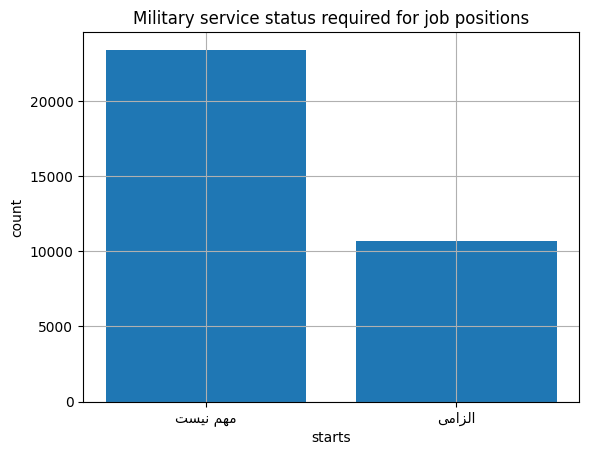

In [ ]:
# bar plot of military service status
temp = military_service_status.value_counts()
plt.bar(x=[get_display(reshape(x)) for x in temp.index],height = temp.values)
plt.title("Military service status required for job positions")
plt.xlabel("starts")
plt.ylabel("count")
plt.grid()
plt.show()

### experience

Years of required experience

In [ ]:
jobs["experience"].unique()

array([nan, 'حداقل 2 سال سابقه کاری مرتبط', '5 سال در سمت مشابه', '3 سال',
       '3 سال در سمت مشابه', '5 سال', '2 سال', '1 سال در سمت مشابه',
       'حداقل 2 سال مرتبط- در اولویت می باشد', 'حداقل3 سال',
       '2 سال در سمت مشابه',
       'داشتن حداقل 2 سال  تجربه کار برنامه نویسی موبایل'], dtype=object)

We can extract experiecne years required for jobs from this colum.

In [ ]:
jobs['experience'].value_counts()

experience
3 سال                                               2
2 سال                                               2
حداقل 2 سال سابقه کاری مرتبط                        1
5 سال در سمت مشابه                                  1
3 سال در سمت مشابه                                  1
5 سال                                               1
1 سال در سمت مشابه                                  1
حداقل 2 سال مرتبط- در اولویت می باشد                1
حداقل3 سال                                          1
2 سال در سمت مشابه                                  1
داشتن حداقل 2 سال  تجربه کار برنامه نویسی موبایل    1
Name: count, dtype: int64

In [ ]:
jobs["experience"].isna().sum()

np.int64(34088)

We can see thta almost all of rows for column are Null value so we drop this column from our dataset!

### date
Date of job ads posting

In [ ]:
jobs['date']

0        1402-03-23
1        1402-02-26
2        1402-02-11
3        1402-02-12
4        1402-04-06
            ...    
34096    1402-03-21
34097    1402-04-19
34098    1402-02-07
34099    1402-03-28
34100    1402-03-28
Name: date, Length: 34101, dtype: object

In [ ]:
jobs["date"].str[:4].astype(int).value_counts()

date
1402    34101
Name: count, dtype: int64

We can see that all job ads posted in 1402 so may be better to regard `month` of data

In [ ]:
jobs["date"].str[5:7].astype(int)

0        3
1        2
2        2
3        2
4        4
        ..
34096    3
34097    4
34098    2
34099    3
34100    3
Name: date, Length: 34101, dtype: int64

well we can see that all of ads are near in month so with high probability this column is not so informatieve so in many contexts we may drop this column!

### min_age

Minimum suggested age

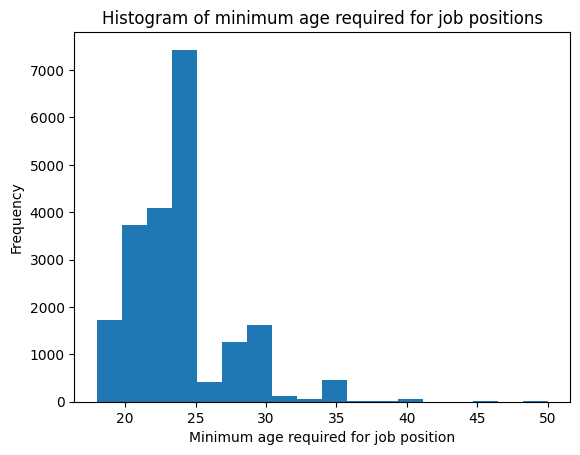

In [ ]:
jobs['min_age'].plot.hist(bins= 18)
plt.xlabel("Minimum age required for job position")
plt.title("Histogram of minimum age required for job positions")
plt.show()

### max_age
Maximum suggested age

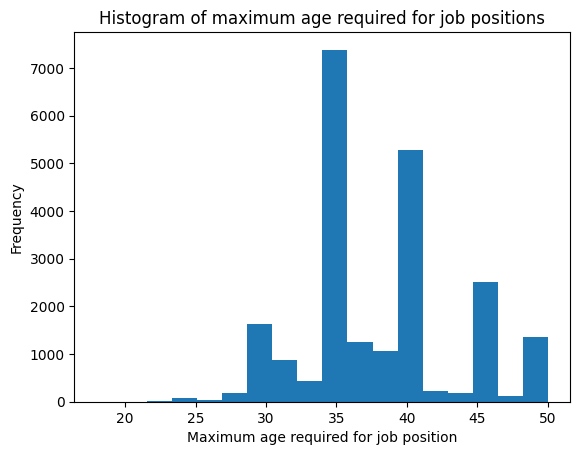

In [ ]:
jobs['max_age'].plot.hist(bins= 18)
plt.xlabel("Maximum age required for job position")
plt.title("Histogram of maximum age required for job positions")
plt.show()

From  these two columns we can see that most job ads has posted for peple with age in [25,40]

# Data cleaning preprocessign normalizations and Extra Visualization Plan

in this section we apply cleaning and insights from previous part then we will have more complecated visualizations for better insights.

- appying cleaning process on data
- preprocessign and normalizations
- extra visualizations for getting better insights

In [ ]:

jobs.min_age.fillna(jobs.min_age.median())

0        23.0
1        23.0
2        24.0
3        25.0
4        20.0
         ... 
34096    22.0
34097    25.0
34098    24.0
34099    35.0
34100    20.0
Name: min_age, Length: 34101, dtype: float64

In [61]:
# create new dataset for cleaned version

jobs_cleaned = pd.DataFrame()

# company size
# filling missing values with min of column
jobs_cleaned['company_size'] = jobs['company_size'].fillna(jobs['company_size'].min())

# education degree
#  one hot endodings of education degree requirement
jobs_cleaned = pd.concat([jobs_cleaned, pd.get_dummies(jobs['education'].apply(lambda x: utils.major_categorizer(x)),dtype=np.int8)],axis=1) 

# gender
jobs_cleaned = pd.concat([jobs_cleaned, pd.get_dummies(jobs['gender'].apply(lambda x : utils.gender_cleaner(x)),dtype=np.int8)],axis=1) 

# salary
# we will calculate the average salary from the min and max salary ranges
# as salary may be target value we don't fill it's null values and later we will drop them

min_salary_range = jobs["salary"].apply(lambda x: utils.salary_cleaner(x, return_min=True))
max_salary_range = jobs["salary"].apply(lambda x: utils.salary_cleaner(x, return_min=False))
avg_salary = (min_salary_range + max_salary_range) / 2
# jobs_cleaned["avg_salary"] = avg_salary
jobs_cleaned['min_salary'] = min_salary_range
jobs_cleaned['max_salary'] = max_salary_range

# number of workdays per week
# we will fill null values with median

jobs_cleaned['days_per_week'] = workdays['days_per_week'].fillna(workdays['days_per_week'].median())

# number of work houres per week
# we will fill null values with median

jobs_cleaned['hours_per_week'] = workdays['hours_per_week'].fillna(workdays['hours_per_week'].median())

# job flexibility
jobs_cleaned['is_flexible'] = flexible_worktime

# language requirement
jobs_cleaned = pd.concat([jobs_cleaned,extracted_language_df],axis=1) 

# business trip status
jobs_cleaned['business_trip'] = jobs["business_trip"].apply(lambda x: utils.business_trip_filter(x))

# industry one hot encoding
jobs_cleaned = pd.concat([jobs_cleaned, utils.generate_one_hot_industry(jobs).filter(like="ind_")], axis=1)

# bonus 
jobs_cleaned = pd.concat([jobs_cleaned, extracted_bonus], axis=1)

# city extracted
# jobs_cleaned = pd.concat([jobs_cleaned,pd.get_dummies(city_extracted,dtype=np.int8)], axis=1)

# job title

top_k = 20
extracted_titles_top_k = extracted_titles.value_counts().nlargest(top_k).index

extracted_titles_filtered = extracted_titles.where(
    extracted_titles.isin(extracted_titles_top_k),
    other="دیگر موقعیت‌ها"
)

jobs_cleaned = pd.concat([jobs_cleaned,pd.get_dummies(extracted_titles_filtered,dtype=np.int8)], axis=1)

# software
softwares_extracted_filtered = softwares_extracted.filter(like="software_")


jobs_cleaned = pd.concat([jobs_cleaned,pd.get_dummies(softwares_extracted_filtered,dtype=np.int8)], axis=1)

# military service status
military_service_status_cleaned = military_service_status.apply(lambda x: "وضعیت سربازی ـ " + x)
jobs_cleaned = pd.concat([jobs_cleaned,pd.get_dummies(military_service_status_cleaned,dtype=np.int8)], axis=1)

# min age required for job position
# filling null values with median
jobs_cleaned["min_age_required"] = jobs.min_age.fillna(jobs.min_age.median())

# max age required for job position
# filling null values with median
jobs_cleaned["max_age_required"] = jobs.max_age.fillna(jobs.max_age.median())

jobs_cleaned

NameError: name 'military_service_status' is not defined

In [ ]:
jobs_cleaned.to_csv('../dataset/jobs_cleaned.csv',index=False)

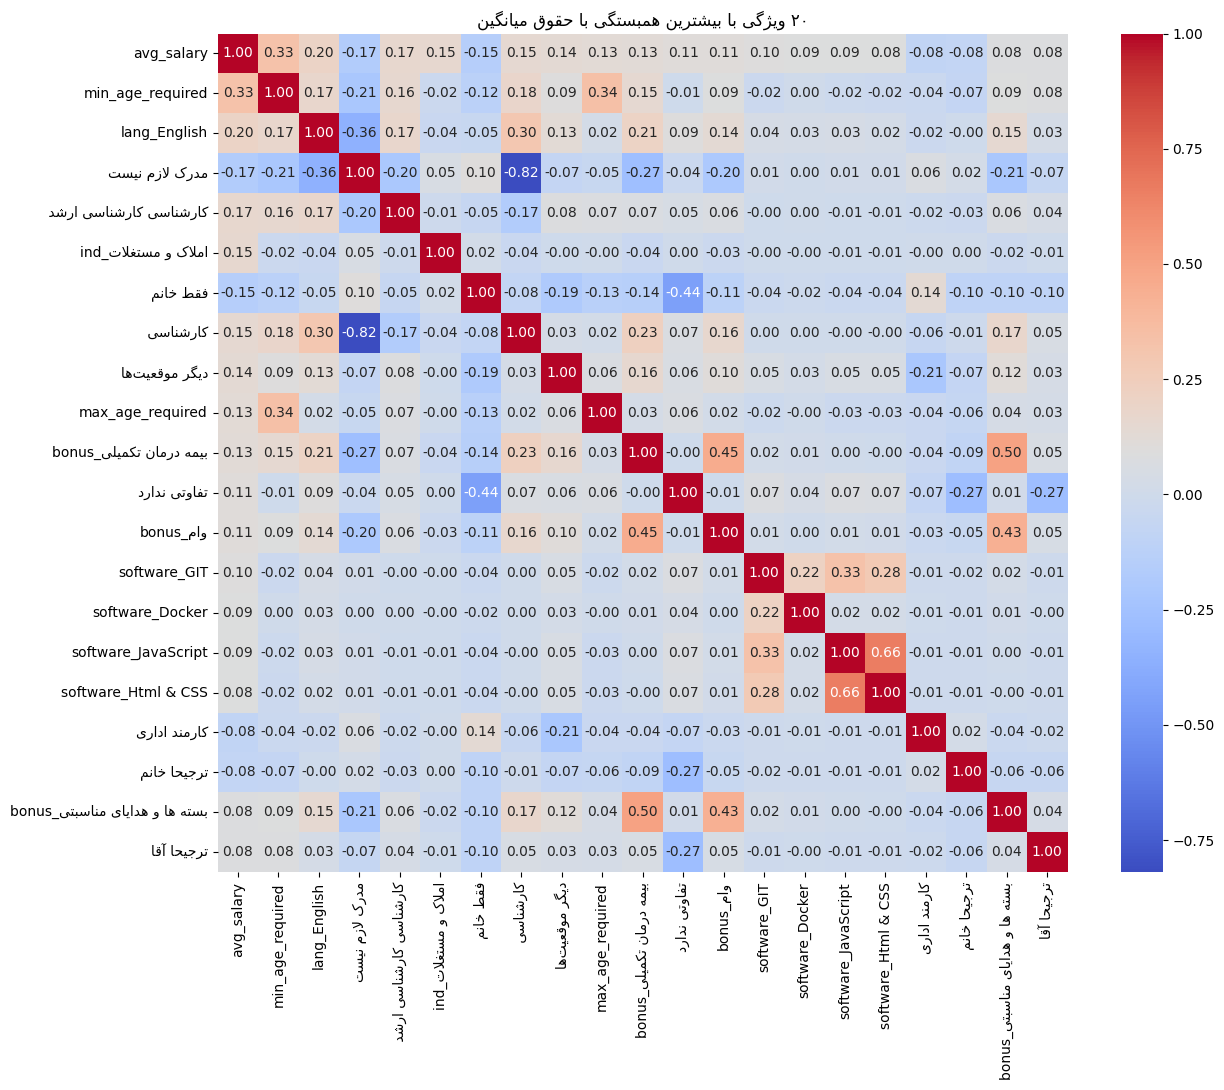

In [ ]:
corr_with_target = jobs_cleaned.corr(numeric_only=True)["avg_salary"].abs()
top20 = corr_with_target.nlargest(21).index      # include avg_salary itself

corr_matrix = jobs_cleaned[top20].corr()

# --- 2. Fix labels (reshape + RTL) ---
def fix_label(text):
    return get_display(reshape(text))

corr_matrix_fixed = corr_matrix.copy()
corr_matrix_fixed.columns = [fix_label(c) for c in corr_matrix.columns]
corr_matrix_fixed.index   = [fix_label(i) for i in corr_matrix.index]

# --- 3. Plot heatmap ---
plt.figure(figsize=(13, 11))
sns.heatmap(corr_matrix_fixed, annot=True, fmt=".2f", cmap="coolwarm")
plt.title(fix_label("۲۰ ویژگی با بیشترین همبستگی با حقوق میانگین"))
plt.tight_layout()
plt.show()

we can see that `min_age_required` and `lang_English` are most correlated features with our target. and if we are do `feature selection` we can use aabove features

# Feature Engineeering

We have done feature engireeing completely in previous sections implicitly so we dont have remaining feature engineerings in this part and as our data is categorical almost we have done it completely. just we do pca for this part

### PCA (90% Explained Variance)

We remove the target column `avg_salary` and apply PCA to the remaining features to reduce dimensionality.  
All features are standardized before PCA to ensure equal contribution.  
Setting `n_components=0.90` retains at least 90% of the total variance.  
The result is a transformed dataset where each column represents an uncorrelated principal component.


In [142]:
X = jobs_cleaned.drop(columns=["avg_salary"])

X.dropna(axis='index',inplace=True)

# If you have categorical columns, ensure they are encoded before PCA.

# --- 2. Standardize features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. Apply PCA with 95% explained variance ---
pca = PCA(n_components=0.90)   # keep components explaining 95% variance
X_pca = pca.fit_transform(X_scaled)

# --- 4. Convert to DataFrame ---
pca_df = pd.DataFrame(
    X_pca,
    columns=[f"PCA_{i+1}" for i in range(X_pca.shape[1])]
)

# View results
print("Number of PCA components kept:", X_pca.shape[1])
print("Explained variance ratio:", pca.explained_variance_ratio_)
pca_df.head()

Number of PCA components kept: 345
Explained variance ratio: [0.01184676 0.01093716 0.00976741 0.00886115 0.00872569 0.0078483
 0.00707946 0.00697034 0.00647504 0.00640108 0.00624848 0.00617802
 0.00617575 0.00606472 0.00598027 0.0058998  0.00584691 0.00580571
 0.00575652 0.00565024 0.00560903 0.00554819 0.00544911 0.00536566
 0.00518619 0.00507961 0.00495191 0.00473788 0.00470401 0.00457943
 0.00453199 0.00450445 0.0043573  0.0043297  0.00430245 0.00429635
 0.00426151 0.0042406  0.00421577 0.00413051 0.00407099 0.0040578
 0.00404797 0.00403695 0.00401232 0.00399329 0.00396468 0.00394402
 0.00393552 0.00390732 0.00390209 0.00387879 0.00384007 0.00378805
 0.00377847 0.00376266 0.00373698 0.00372733 0.00372214 0.00368599
 0.00367685 0.00366043 0.00361992 0.00359277 0.0035565  0.00353939
 0.00351493 0.00348369 0.00340813 0.00337765 0.00335259 0.00332929
 0.00330831 0.00327793 0.00326648 0.00322785 0.00320887 0.0031996
 0.00316787 0.00316124 0.0031271  0.00310755 0.00309421 0.00307441
 0.0

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_336,PCA_337,PCA_338,PCA_339,PCA_340,PCA_341,PCA_342,PCA_343,PCA_344,PCA_345
0,-0.384643,1.427308,-1.053933,0.178335,0.009413,-0.306012,0.883481,3.825192,0.312659,-0.229823,...,-0.496583,-0.289920,0.252434,-0.236275,-0.000818,0.184124,0.608910,0.325682,-0.233088,0.058507
1,-0.598925,0.825435,-0.960688,0.395647,-0.833653,-0.689474,-0.523912,-2.909395,0.684850,0.042306,...,0.496783,-0.316652,0.455520,-0.097078,-0.418803,-0.079144,0.425969,0.526851,0.290491,0.041657
2,0.161994,-1.282320,0.914845,-0.851760,2.633620,7.376533,-1.648254,-1.571976,-2.130685,-0.484841,...,-0.968544,-0.817128,-0.288459,-0.047513,-1.088903,-0.676094,1.714273,0.388751,0.396047,-1.183698
3,-0.728216,0.726072,-0.498851,0.069176,0.063530,-0.472551,0.023126,2.168612,-0.567428,-0.110788,...,0.273032,0.111577,0.378472,-0.287674,-0.298162,-0.159911,-0.156312,0.090378,-0.683779,1.114475
4,1.379295,-0.088036,0.770770,-0.330710,0.185304,0.133119,-0.872869,-1.953068,-0.479591,0.054965,...,-0.452003,-0.069192,0.057232,-0.233065,0.130399,0.649929,1.050953,0.559434,-0.468468,0.751015
